<div dir="rtl" style="text-align: right;">
    
# بخش یک : تحلیل اولیه دیتاست





<div dir="rtl" style="text-align: right;">

## رویکرد


<div dir="rtl" style="text-align: right;">
علارغم تجربه قبلی در کارکردن با دیتاست های مختلف در حیطه های گوناگون (نظیر دیتاست های مکانی-زمانی از قبیل قرائت کنتورهای استان تهران یا ماتریس های سه بعدی سری زمانی فرونشست) در محیط پایتون، دیتاست مالی برای من تجربه جدیدی بود. به همین دلیل پیش از پاسخ به سوالات این مرحله، نیاز به کاوش و شناخت دیتاست و اصطلاحاً "سوار شدن" بر دیتاست داشتم. برای رسیدن به این هدف چهار گام را تعریف کردم تا لایه به لایه و از سطح به عمق، دیتا را کاوش کنم و آن را بشناسم. برای هر گام، مختصری از دلیل انجام آن گام خواهم نوشت و پس از اجرای کد مربوط به آن، insight خودم در مورد خروجیِ آن مرحله خواهم نوشت.


<div dir="rtl" style="text-align: right;">

### گام اول: بررسی اولیه کمی و کیفی  دیتاست





<div dir="rtl" style="text-align: right;">
در این گام، ویژگی های کلی دیتاست نظیر dimention و وجود دمقادیر گم شده یا ریکورد های تکراری را بررسی خواهیم کرد.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv('MasterClass-FinTech01-Data.csv')  
df. head()


,monthly_income,avg_monthly_spend,credit_limit,num_transactions,account_tenure_months,cash_withdraw_ratio,late_payment_count,age,region_risk_score,marketing_score,app_login_count,employment_type,debt_to_income,payment_delay_ratio,repayment_issue
0,26867.849400,18963.331725,13797.840243,31,114,0.236576,2,60,0.106796,59.591421,24,self_employed,0.705800,0.062500,1
1,20841.350135,10425.045672,19907.767202,36,64,0.028460,0,20,0.086290,63.392608,16,other,0.500210,0.000000,1
2,28540.385984,9244.744459,23277.396544,45,50,0.330158,0,24,0.438799,62.237803,31,other,0.323918,0.000000,1
3,40506.265408,13339.455402,52088.041939,44,12,0.000000,3,60,0.290462,53.793908,20,self_employed,0.329318,0.066667,1
4,20057.103316,12374.793741,32688.989694,34,107,0.414542,2,39,0.238047,56.238840,12,salaried,0.616978,0.057143,1


In [4]:
df.shape  # rows and columns
df.info()  # data types and non-null counts
df.columns  # all column names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   monthly_income         1389 non-null   float64
 1   avg_monthly_spend      1500 non-null   float64
 2   credit_limit           1500 non-null   float64
 3   num_transactions       1500 non-null   int64  
 4   account_tenure_months  1500 non-null   int64  
 5   cash_withdraw_ratio    1500 non-null   float64
 6   late_payment_count     1500 non-null   int64  
 7   age                    1500 non-null   int64  
 8   region_risk_score      1500 non-null   float64
 9   marketing_score        1500 non-null   float64
 10  app_login_count        1500 non-null   int64  
 11  employment_type        1391 non-null   object 
 12  debt_to_income         1500 non-null   float64
 13  payment_delay_ratio    1500 non-null   float64
 14  repayment_issue        1500 non-null   int64  
dtypes: f

Index(['monthly_income', 'avg_monthly_spend', 'credit_limit',
       'num_transactions', 'account_tenure_months', 'cash_withdraw_ratio',
       'late_payment_count', 'age', 'region_risk_score', 'marketing_score',
       'app_login_count', 'employment_type', 'debt_to_income',
       'payment_delay_ratio', 'repayment_issue'],
      dtype='object')

In [5]:
# Count missing values
df.isnull().sum()

# Percentage of missing values
(df.isnull().sum() / len(df) * 100).round(2)

monthly_income           7.40
avg_monthly_spend        0.00
credit_limit             0.00
num_transactions         0.00
account_tenure_months    0.00
cash_withdraw_ratio      0.00
late_payment_count       0.00
age                      0.00
region_risk_score        0.00
marketing_score          0.00
app_login_count          0.00
employment_type          7.27
debt_to_income           0.00
payment_delay_ratio      0.00
repayment_issue          0.00
dtype: float64

In [6]:
# Look for empty strings that should be NaN
df. replace('', np.nan, inplace=True)
df.isnull().sum()

monthly_income           111
avg_monthly_spend          0
credit_limit               0
num_transactions           0
account_tenure_months      0
cash_withdraw_ratio        0
late_payment_count         0
age                        0
region_risk_score          0
marketing_score            0
app_login_count            0
employment_type          109
debt_to_income             0
payment_delay_ratio        0
repayment_issue            0
dtype: int64


<div dir="rtl" style="text-align: right;">
    
#### برداشت ها


 >- دو ستون درامد ماهانه `monthly_income` و نوع استخدامحدود `employment_type` حدود **7 درصد** داده ی گم شده دارد


<div dir="rtl" style="text-align: right;">

### گام دوم : شناخت متغیر هدف

<div dir="rtl" style="text-align: right;">
در این بخش، هدف اصلی ما این است که آیا این متغییر به صورت imbalance در دیتاست ما وجود دارد یا خیر. پاسخ به این سوال، تاثیر مهمی در انتخاب روش مدل سازی ما دارد. چرا که اگر  داده بالانس نباشد و ما آن را در نظر نگرفته باشیم، مدل دچار بایاس شده و به سمت ناصحیحی سوگیری خواهد داشت.


In [ ]:
# Count target variable
df['repayment_issue'].value_counts()

# Percentage distribution
df['repayment_issue'].value_counts(normalize=True) * 100

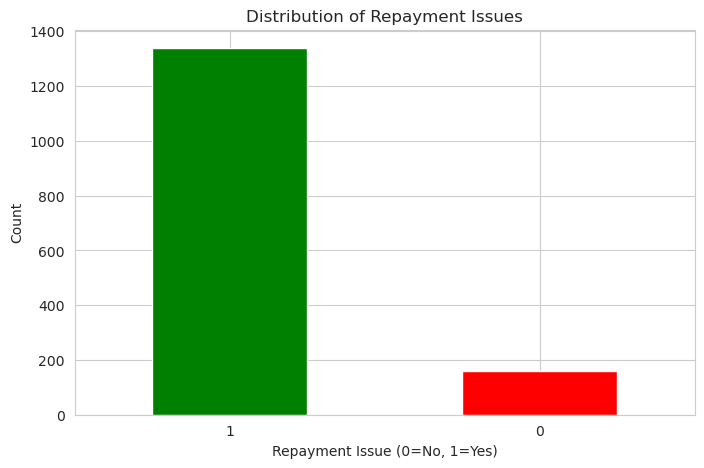

In [74]:
plt.figure(figsize=(8, 5))
df['repayment_issue'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Repayment Issues')
plt.xlabel('Repayment Issue (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()



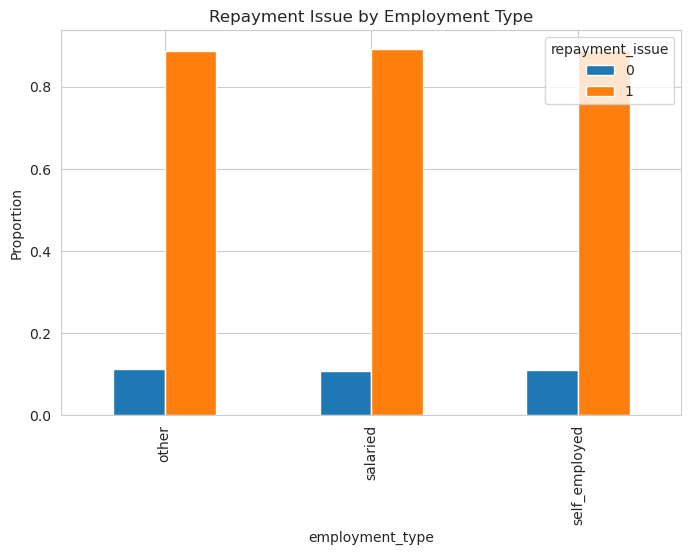

In [73]:
# Employment type vs repayment issue
pd. crosstab(df['employment_type'], df['repayment_issue'], normalize='index').plot(
    kind='bar', 
    figsize=(8, 5)  # Add this line (width, height)
)
plt.title('Repayment Issue by Employment Type')
plt.ylabel('Proportion')
plt.show()

<div dir="rtl" style="text-align: right;">
    
#### برداشت ها
>- متغیر هدف، به شدت imbalance است !
>- این موضوع میتواند باعث شود مدل آینده ی ما، به طور ناصحیحی 90 درصد افراد را فاقد صلاحیت دانسته و مشتریان خوش حساب را نیز به صورت اشتتباه در کتگوری مشکل دار ها قرار دهد.
>  گروه های شغلی، به صورت بالانس و متعادل در دیتاست وجود دارد و از این بابت خیال مان راحت است.


<div dir="rtl" style="text-align: right;">


### گام سوم : پیدا کردن متغییر هایی که با کمک آن، ریسک را تشخیص می توان داد

<div dir="rtl" style="text-align: right;">
بر اساس مطالعات و سرچ ها و در نهایت جمع بندی و اندکی تآمل در متغیر ها و استفاده از منطق شخصی، متغیر هایی که به نظر خودم، میتوانند تاثیر بیشتری در پرداخت یا عدم پرداخت وجه دریافیِ مشتری شوند را، بر اساس زیر، دسته بندی کردم و کامنت های ذهنی و منطقی ام را برای هر متغیر ذکر کردم. 


 <div dir="rtl" style="text-align: right;">   
<strong> الف)  متغیر های مربوط به توانایی مالی مشتری<strong/> 
    
    monthly_income : درامد ماهانه اش چقدر است ؟
    debt_to_income : نسبت بدهی به درامدش چقدر است ؟
    avg_monthly_spend : ماهی جقدر خرج می کند؟
    credit_limit : اعتبار در دسترس مشتری، چه میزان است ؟
    


 <div dir="rtl" style="text-align: right;">   
<strong> ب) رفتار مالی مشتری <strong/> 
    
    late_payment_count : چند بار دیر پرداخت کرده (بدحساب) ؟
    payment_delay_ratio : تاخیر در پرداخت ( بدحساب) ؟
    cash_withdraw_ratio : میزان نقد کردن اعتبار ( شاید مشکل مالی پیش آمده براش)


 <div dir="rtl" style="text-align: right;">   
<strong> ج) متغیر های مربوط به ویژگی های شخصی و پروفایل مشتری<strong/>    
    
    age : سن (آیا سن بالاتر، ریسک بازپرداخت را ممکن است زیاد کند ؟
    employment_type : شغل ( آیا شغل ش درامد پایداری به او می دهد؟)
    account_tenure_months : مشتری قدیمی است یا جدید ؟ ( مشتری قدیمی شاید بتواند ریسک را کمتر کند چون رفتارش را میدانیم)
    credit_limit : اعتبار در دسترس مشتری، چه میزان است ؟
    


 <div dir="rtl" style="text-align: right;">   
<strong> د) متغیر های مربوط به فعالیت مشتری در سامانه ما<strong/>    
    
    app_login_count : آیا کاربرانی که بیشتر لاگین کردن توی سامانه، پرداختی هایشان بهتر انجام شده(خوش حساب بودند)؟
    num_transactions : فعالیت کاربر چه تاثیری در پرداخت دارد؟
    

 <div dir="rtl" style="text-align: right;">  
     
##### برای بررسی متغیر ها و رابطه آن ها با هم دیگر ( همبستگی میان متغیر های مستقل) و بررسی رابطه آن ها با متغیر هدف ( همبستگی متغیر ها با متغیر وابسته) از هیت مپ استفاده میکنیم تا بتوانیم با سرعت یک قضاوت کلی روی داده داشته باشیم.

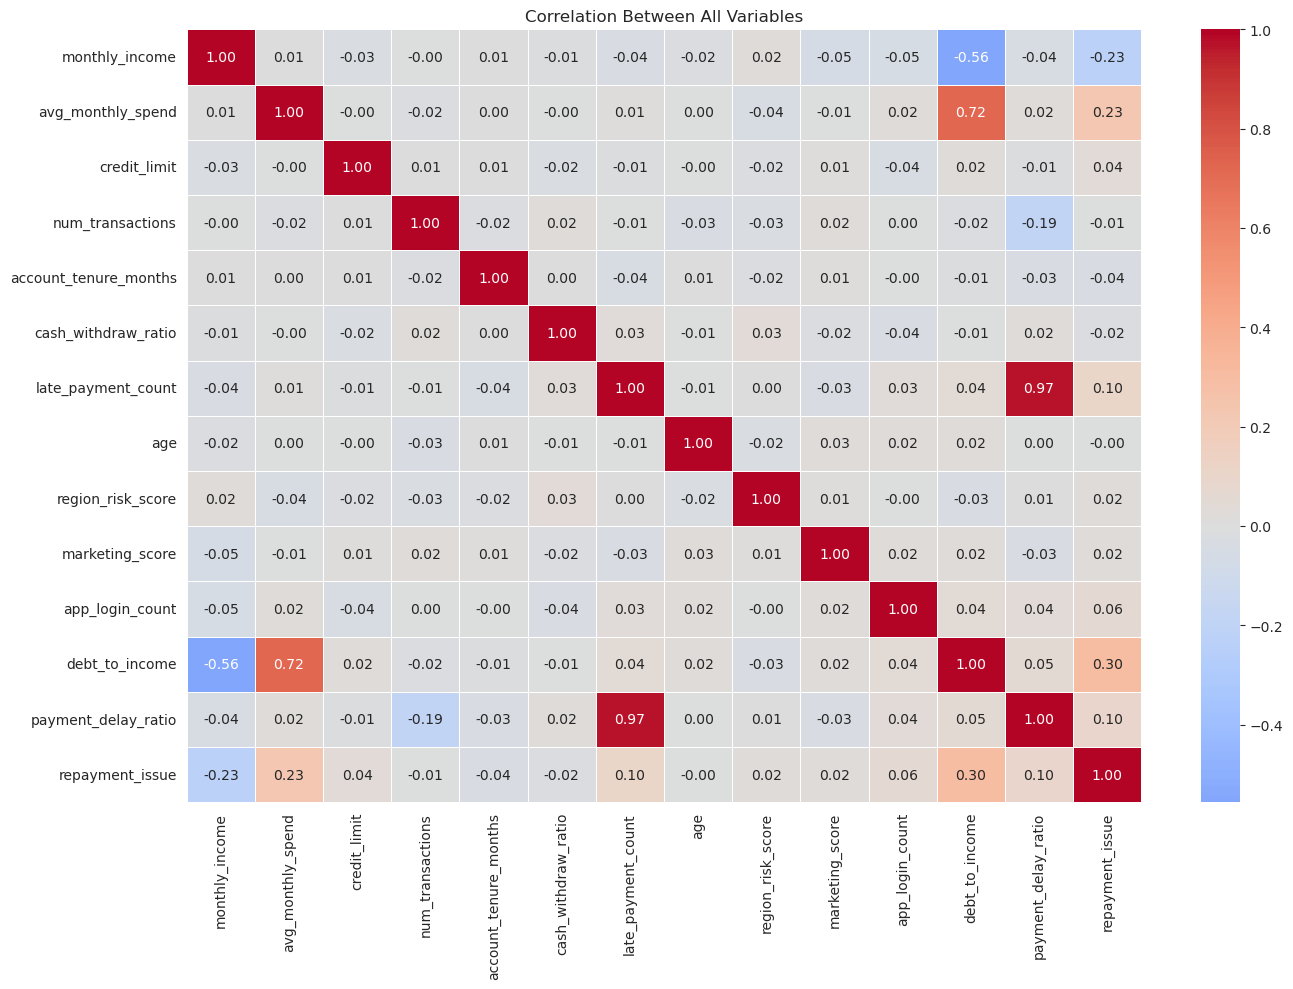

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    df_numeric.corr(), 
    annot=True,
    cmap='coolwarm',
    center=0,
    fmt='.2f',
    linewidths=0.5
)
plt.title('Correlation Between All Variables')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')  # Save for your report!
plt. show()

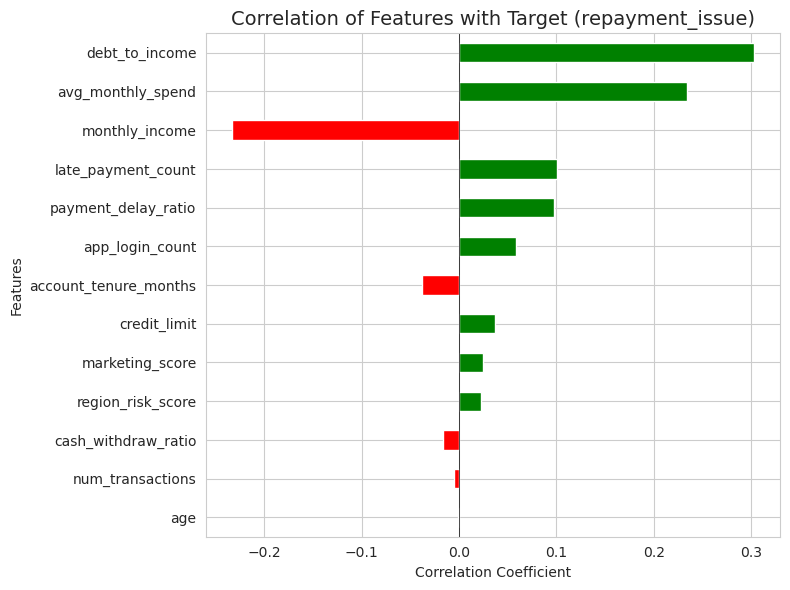

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get correlation with target only
target_correlation = df_numeric.corr()['repayment_issue'].drop('repayment_issue')

# Sort by absolute value (strongest first)
target_correlation = target_correlation.sort_values(key=abs, ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(8, 6))
colors = ['green' if x > 0 else 'red' for x in target_correlation]
target_correlation.plot(kind='barh', color=colors)

plt.title('Correlation of Features with Target (repayment_issue)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.savefig('target_correlation.png')
plt. show()

<div dir="rtl" style="text-align: right;">

#### برداشت ها

#### **همبستگی میان متغیر های مستقل** :
>- دو متغیر `late_payment_count` و `payment_delay_ratio` میزان همبستگی تقریبا برابر با **1** دارند، بنابرین عملا انگار دارند یک چیزِ واحد را اندازه میگیرند. پس در مدل سازی آتی، میتوان یکی از آن دو را کنار گذاشت
>- دو متغیر `avg_monthly_spend` و `debt_to_income` همانطور که منطق حکم میکرد، همبستگی بالایی دارند ( حدود **0.7**) چراکه هرچی مشتری بیشتر خرج کند، احتمال افزایش نسبت بدهی به درامدش بالاتر خواهد رفت.
>- مورد جالب توجه این است که بین متغیر `monthly_income و debt_to_income` همبستگی معکوس وجود دارد. که البته این مورد نیز منطقی به نظر میرسد چرا که هرچه درامد مشتری بالاتر رود، نسبت بدهی به درامد آن کمتر خواهد شد.

#### **همبستگی متغیرهای مستقل با متغیر وابسته** :
>- سه متغیر `debt_to_income - avg_monthly_spend - monthly_income` بین حدود **0.3 تا 0.2** همبستگی با متغیر هدف ما نشان داند. این مورد از این حیث مهم است که می توان به کمک آن، تا حدی پیشبینی کرد که متغیر وابسته چه خواهد بود.


 <div dir="rtl" style="text-align: right;">  

### گام چهارم : بررسی برخی از الگو های مشکوک و موارد خاص در دیتاست

In [104]:
df[df['debt_to_income'] > 1.5] 

,monthly_income,avg_monthly_spend,credit_limit,num_transactions,account_tenure_months,cash_withdraw_ratio,late_payment_count,age,region_risk_score,marketing_score,app_login_count,employment_type,debt_to_income,payment_delay_ratio,repayment_issue,dti_group,dti_category,has_late_payments
16,14689.196225,26398.233776,15807.327441,44,48,0.044773,0,35,0.384546,27.178369,25,self_employed,1.797119,0.000000,1,Extreme (>1.5),Extreme,0
19,NaN,30771.421192,32633.977526,26,23,0.107547,1,62,0.023244,44.307811,24,salaried,2.000000,0.037037,1,Extreme (>1.5),Extreme,1
26,NaN,31196.582660,28757.341251,31,69,0.084237,1,52,0.043259,36.476518,18,salaried,2.000000,0.031250,1,Extreme (>1.5),Extreme,1
49,10881.114359,23204.928043,40906.179690,32,39,0.502770,0,53,0.070102,49.914157,19,salaried,2.000000,0.000000,1,Extreme (>1.5),Extreme,0
74,7724.110568,16479.846549,20815.193413,39,84,0.073613,2,66,0.349356,48.961709,29,other,2.000000,0.050000,1,Extreme (>1.5),Extreme,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,12190.782014,22717.170876,33090.607280,38,15,0.324625,3,61,0.370544,63.985629,17,salaried,1.863471,0.076923,1,Extreme (>1.5),Extreme,1
1369,15461.045011,23226.316022,29089.855745,37,99,0.313919,1,30,0.071734,46.784166,17,salaried,1.502247,0.026316,1,Extreme (>1.5),Extreme,1
1395,23715.215429,78182.957492,16728.495490,34,41,0.000000,0,28,0.110703,69.574103,13,self_employed,2.000000,0.000000,1,Extreme (>1.5),Extreme,0
1397,NaN,29030.825491,19197.396983,49,53,0.186496,0,22,0.211133,33.958964,25,self_employed,1.944022,0.000000,1,Extreme (>1.5),Extreme,0


 <div dir="rtl" style="text-align: right;">
     
     **مورد جالب: مشتریانی هستند که بیش از درامد شان، خرج کرده اند**

In [105]:
# Let's check:  Do ALL of them default?
extreme_dti = df[df['debt_to_income'] > 1.5]

print(f"Total customers with DTI > 1.5: {len(extreme_dti)}")
print(f"How many has payment issu?  {extreme_dti['repayment_issue'].sum()}")
print(f"issue rate: {extreme_dti['repayment_issue'].mean() * 100:.1f}%")

Total customers with DTI > 1.5: 84
How many has payment issu?  84
issue rate: 100.0%


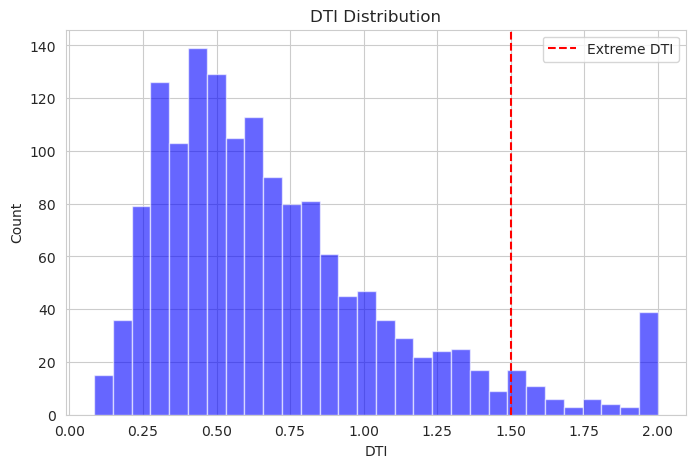

In [66]:
plt.figure(figsize=(8, 5))
plt.hist(df['debt_to_income'], bins=30, color='blue', alpha=0.6)
plt.axvline(1.5, color='red', linestyle='--', label='Extreme DTI')
plt.xlabel('DTI')
plt.ylabel('Count')
plt.title('DTI Distribution')
plt.legend()
plt.show()

In [93]:
# Categorize by DTI
df['dti_category'] = pd.cut(df['debt_to_income'], 
                             bins=[0, 0.6, 0.8, 1.0, 1.5, 3.0],
                             labels=['Low', 'Moderate', 'High', 'Very High', 'Extreme'])

# Check it
print(df['dti_category'].value_counts().sort_index())

dti_category
Low          743
Moderate     293
High         187
Very High    193
Extreme       84
Name: count, dtype: int64


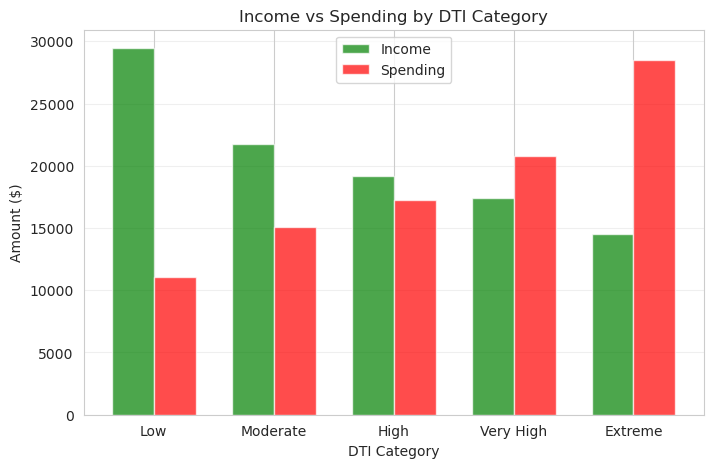

In [98]:
# Chart Income vs Spending
plt.figure(figsize=(8, 5))

income_avg = df. groupby('dti_category')['monthly_income'].mean()
spending_avg = df.groupby('dti_category')['avg_monthly_spend'].mean()

x = range(len(income_avg))
width = 0.35

plt.bar([i - width/2 for i in x], income_avg, width, label='Income', color='green', alpha=0.7)
plt.bar([i + width/2 for i in x], spending_avg, width, label='Spending', color='red', alpha=0.7)

plt.xlabel('DTI Category')
plt.ylabel('Amount ($)')
plt.title('Income vs Spending by DTI Category')
plt.xticks(x, income_avg.index)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

<div dir="rtl" style="text-align: right;">

### برداشت ها
>- در بین 1500 ریکورد، 84 ریکورد بیش از **1.5** برابر درآمد شان، خرج کرده بودند.
>- بررسی بیشتر نشان داد که **تمامی** این افراد، دچار مشکل در پداخت شده بودند و بع عبارت دیگر، **متغیر هدف** برای آن ها برابر با **1** بود
>- در نتیجه، میتوانیم این شاخص را در نظر بگیریم که اگر `DTI => 1.5` باشد، قطعا مشتری مشکل پرداخت خواهد داشت
>- نکته جالب توجه دیگر آن که، مشتریانی `DTI` در آن ها پایین تر است، **درامد سرانه** بالاتری نیز دارند.

<div dir="rtl" style="text-align: right;">

 ##  پاسخ به سوالات بخش 1

<div dir="rtl" style="text-align: right;">

### سوال 1 : ‫به‬ ‫نظر‬‫شما‬ ‫کدام‬ ‫متغیرها‬ ‫می‬ ‫توانند‬‫بیشترین‬ ‫ارتباط‬ ‫را‬ ‫با‬ ‫متغیر‬ ‫هدف‬ ‫داشته‬ ‫باشند؟‬ ‫چرا؟‬ 


<div dir="rtl" style="text-align: right;">
    
### پاسخ 1    

با توجه به بررسی هم بستگی میان متغیر ها ( هم به صورت بررسی همبستگی میان متغیر های مستقل و هم با متغیر وابسته) و جمع بندی گام سوم از بخش یک، تصمیم گرفتم این متغییر هارا انتخاب کنم. تحلیل کامل تر و چارت های ترسیم شده، در قسمت فوق قرار داده شده اند

`debt_to_income`
`monthly_income`
`avg_monthly_spend`
`late_payment_count`
`payment_delay_ratio`
`Cash_withdraw_ratio`




<div dir="rtl" style="text-align: right;">

#### برداشت ها

#### **همبستگی میان متغیر های مستقل** :
>- دو متغیر `late_payment_count` و `payment_delay_ratio` میزان همبستگی تقریبا برابر با **1** دارند، بنابرین عملا انگار دارند یک چیزِ واحد را اندازه میگیرند. پس در مدل سازی آتی، میتوان یکی از آن دو را کنار گذاشت
>- دو متغیر `avg_monthly_spend` و `debt_to_income` همانطور که منطق حکم میکرد، همبستگی بالایی دارند ( حدود **0.7**) چراکه هرچی مشتری بیشتر خرج کند، احتمال افزایش نسبت بدهی به درامدش بالاتر خواهد رفت.
>- مورد جالب توجه این است که بین متغیر `monthly_income و debt_to_income` همبستگی معکوس وجود دارد. که البته این مورد نیز منطقی به نظر میرسد چرا که هرچه درامد مشتری بالاتر رود، نسبت بدهی به درامد آن کمتر خواهد شد.

#### **همبستگی متغیرهای مستقل با متغیر وابسته** :
>- سه متغیر `debt_to_income - avg_monthly_spend - monthly_income` بین حدود **0.3 تا 0.2** همبستگی با متغیر هدف ما نشان داند. این مورد از این حیث مهم است که می توان به کمک آن، تا حدی پیشبینی کرد که متغیر وابسته چه خواهد بود.


<div dir="rtl" style="text-align: right;">

### سوال 2 : ‫آیا‬ ‫داده‬ ‫شامل‬ ‫موارد‬ ‫گمشده‪،‬‬ ‫توزیع‬ ‫های‬‫ نامتوازن‬ ‫یا‬ ‫الگوهای‬ ‫غیرعادی‬ ‫است؟‬

<div dir="rtl" style="text-align: right;">

### پاسخ 2
>- در بین 1500 ریکورد، **84** ریکورد بیش از **1.5** برابر درآمد شان، خرج کرده بودند.
>- بررسی بیشتر نشان داد که **تمامی** این افراد، دچار مشکل در پداخت شده بودند و بع عبارت دیگر، **متغیر هدف** برای آن ها برابر با **1** بود
>- در نتیجه، میتوانیم این شاخص را در نظر بگیریم که اگر `DTI => 1.5` باشد، قطعا مشتری مشکل پرداخت خواهد داشت
>- نکته جالب توجه دیگر آن که، مشتریانی `DTI` در آن ها پایین تر است، **درامد سرانه** بالاتری نیز دارند.

>- متغیر هدف `payment_issue`، به شدت **imbalance** است !
>- این موضوع میتواند باعث شود مدل آینده ی ما، به طور ناصحیحی **90 درصد** افراد را فاقد صلاحیت دانسته و **مشتریان خوش حساب** را نیز به صورت اشتتباه در کتگوری مشکل دار ها قرار دهد.
>  گروه های شغلی، به صورت **بالانس** و متعادل در دیتاست وجود دارد و از این بابت خیال مان راحت است.



<div dir="rtl" style="text-align: right;">

### سوال 3 ‫یک‬ ‫یا‬ ‫دو‬ ‫نمودار‬ ‫ساده‬ ‫برای‬ ‫پشتیبانی‬ ‫از‬ ‫تحلیل‬ ‫خود‬ ‫ارائه‬ ‫دهید‬ ‫؛‬

<div dir="rtl" style="text-align: right;">

### پاسخ 3
>- نمودار های مورد نظر، در گام های چهارگانه در بالا اورده شده اند. 

<div dir="rtl" style="text-align: right;">
    

# بخش 2 : مدل سازی

In [133]:
# ============================================================
# CREDIT DEFAULT PREDICTION MODEL
# Simple Logistic Regression
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

print("="*60)
print("STEP 1: SELECT FEATURES")
print("="*60)

# Choose features based on analysis
features = [
    'debt_to_income',
    'monthly_income',
    'avg_monthly_spend',
    'late_payment_count',
    'payment_delay_ratio',
    'credit_limit',
    'cash_withdraw_ratio',
    'age',
    'account_tenure_months'
]

target = 'repayment_issue'

# Prepare data
X = df[features]. copy()
y = df[target]. copy()

# Handle missing values
X = X.fillna(X.median())

print(f"Features: {len(features)}")
print(f"Samples: {len(X)}")
print(f"Defaults: {y.sum()} ({y.mean()*100:.1f}%)")

# ============================================================
print("\n" + "="*60)
print("STEP 2: SPLIT DATA")
print("="*60)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training: {len(X_train)} samples")
print(f"Testing:  {len(X_test)} samples")

# ============================================================
print("\n" + "="*60)
print("STEP 3: SCALE FEATURES")
print("="*60)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features scaled")

# ============================================================
print("\n" + "="*60)
print("STEP 4: TRAIN MODEL")
print("="*60)

# Train logistic regression
model = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=1000
)

model.fit(X_train_scaled, y_train)

print("Model trained")

# ============================================================
print("\n" + "="*60)
print("STEP 5: MAKE PREDICTIONS")
print("="*60)

# Predict on test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Predictions complete")

# ============================================================
print("\n" + "="*60)
print("STEP 6: EVALUATE MODEL")
print("="*60)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nAccuracy:   {accuracy*100:.2f}%")
print(f"ROC-AUC:   {roc_auc:.4f}")

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Classification report
print("\n Detailed Results:")
print(classification_report(y_test, y_pred, 
                          target_names=['No Default', 'Default']))

# ============================================================
print("\n" + "="*60)
print("STEP 7: FEATURE IMPORTANCE")
print("="*60)

# Show which features matter most
importance_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\n", importance_df.to_string(index=False))

print("\n Positive = increases default risk")
print(" Negative = decreases default risk")

# ============================================================
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f" Model Accuracy:   {accuracy*100:.2f}%")
print(f" ROC-AUC Score:   {roc_auc:.4f}")
print(f" Top Predictor:   {importance_df. iloc[0]['Feature']}")
print(f" Model Type:      Logistic Regression")
print("="*60)

STEP 1: SELECT FEATURES
Features: 9
Samples: 1500
Defaults: 1339 (89.3%)

STEP 2: SPLIT DATA
Training: 1200 samples
Testing:  300 samples

STEP 3: SCALE FEATURES
 Features scaled

STEP 4: TRAIN MODEL
Model trained

STEP 5: MAKE PREDICTIONS
Predictions complete

STEP 6: EVALUATE MODEL

Accuracy:   74.67%
ROC-AUC:   0.8673

Confusion Matrix:
[[ 29   3]
 [ 73 195]]

 Detailed Results:
              precision    recall  f1-score   support

  No Default       0.28      0.91      0.43        32
     Default       0.98      0.73      0.84       268

    accuracy                           0.75       300
   macro avg       0.63      0.82      0.63       300
weighted avg       0.91      0.75      0.79       300


STEP 7: FEATURE IMPORTANCE

               Feature  Coefficient
       debt_to_income     2.798070
   late_payment_count     0.686110
    avg_monthly_spend     0.351690
         credit_limit     0.092680
  cash_withdraw_ratio    -0.019370
       monthly_income    -0.029631
             

<div dir="rtl" style="text-align: right;">

## نتایج :

 `Model Accuracy`:   74.67% |
 `ROC-AUC Score`:   0.8673 |
 `Top Predictor`:   debt_to_income |
 `Model Type`:      Logistic Regression

<div dir="rtl" style="text-align: right;">

# بخش 3 : تحلیل و تفسیر

<div dir="rtl" style="text-align: right;">

### ‫‪1‬‬‫‪.‬‬‫مدل‬ ‫شما‬ ‫به‬ ‫طور‬‫کلی‬ ‫چه‬ ‫چیزی‬ ‫را‬ ‫یاد‬ ‫گرفته‬ ‫است؟‬


<div dir="rtl" style="text-align: right;">
    
### پاسخ 1
به صورت کلی، مدل من یاد گرفته که بالاترین ریسک برای عدم پرداخت، متغیر `debt_to_income` است. و پس از آن `سابقه مشتری در پرداخت دیرهنگام`  میتواند بیشترین تاثیر را در تصمیمِ مدل برای قراردادن مشتری در کتگوری " مشکل زا" بگذارد
    

<div dir="rtl" style="text-align: right;">

### ‫‪2‬‬‫‪.‬‬‫در‬ ‫چه‬ ‫شرایطی‬ ‫ممکن‬ ‫است‬ ‫این‬ ‫مدل‬ ‫تصمیم‬ ‫اشتباه‬ ‫بگیرد؟‬

<div dir="rtl" style="text-align: right;">

### پاسخ 2
>- تصمیمگیری مدل، از آنجایی که بر اساس داده های موجود است و همچنین برخی پارامتر ها تاثیر خیلی زیادی در تصمیم گیری مدل دارند، در یک سری سناریو مدل میتواند اشتباه کند.مثلا این سناریو را در نظر بگیرید : شخصی با `DIT` پایین، `درامد بالا` و `مخارج پایین`، ممکن است باز هم در پرداخت fail شود. این مورد میتواند در عالم واقع، دلایل دیگری به جز دلایل تکنیکال داشته باشد و احتمالا عوامل **فاندامنتال** ( مثلا مشکل خانوادگی) موجب شود که مشتری بدهی را پرداخت نکند. به عبارت دیگر، مدل صرفا بر اساس **داده های موجود** در حال قضاوت است، و دنیای واقعی متغییر های بسیار بیشتری دارد و گاهی آن متغیر ها به سختی قابلیت کمی سازی و یا دستیابی برایشان وجود دارد. بنابرین مدل ما، در بهترین حالت از نظر آماری میتواند ریسکِ سمت ما ( یعنی خدمت دهنده) را کاهش داده و بر اساس داده موجود، تصمیمی بگیرد که تا **درصد خوبی** درست است اما الزاما همیشه اینگونه نیست.


<div dir="rtl" style="text-align: right;">
    
### ‫‪3‬‬‫‪.‬‬‫اگر‬ ‫زمان‬ ‫یا‬ ‫داده‬ ‫ی‬‫بیشتری‬ ‫در‬ ‫اختیار‬ ‫داشتید‪،‬‬ ‫چه‬ ‫چیزی‬ ‫را‬ ‫بهبود‬ ‫می‬ ‫دادید؟‬

<div dir="rtl" style="text-align: right;">

### پاسخ 3

>- اگر زمان بیشتری داشتم، اول از همه در قسمت **data spliting** برای تمرین مدل، متد **k fold** را پیاده می کردم تا تقسیم داده برای تست و تمرین را تا حد ممکن **randomize** کنم. در وهله بعد سعی میکردم مدل های دیگری را نیز تست کنم و نتایج آنها را باهم مقایسه کنم و پس از آن، بررسی کنم و بببینم چرا فلان مدل با دقت بالاتری تخمین زده است. این موضوع به شناخت من نسبت به **رفتار داده** در مدل های پیشبینی، قطعا کمک خواهد کرد.
>- اگر داده بیشتری داشتم ( مخصوصا با `فیچر های بیشتر`) سعی میکردم عوامل دیگری را هم برای تمرین مدل مد نظر قرار دهم. همچنین سعی میکردم با روش هایی مانند `sample` و `feature engineering` ، دیتا را از حالت غیر بالانس خارج کنم.
>- در وهله آخر، تلاش میکردم مدتی را به مطالعه عمیق تر در حیطه **فین تک** بپردازم و بینش جامع تری نسبت به فیچر های موجود برای مبحث credit scroing کسب کنم. از آنجایی که اقتصاد ما در حال ورود به این بازار است **( مثلا وام های دیجی پی و یا اسنپ پی)** قطعا جای بسیاری برای کار و بهبود سیستم های هوشمند تصمیم گیرنده برای تخصیص اعتبار به مشتری، وجود خواهد داشت. و از این بابت دلگرم کننده ست که نظام بانکی از سیستم `debit` به سیستم `credit` در حال حرکت است.